In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-data-cleaning/__results__.html
/kaggle/input/titanic-data-cleaning/__notebook_source__.ipynb
/kaggle/input/titanic-data-cleaning/titanic_train_cleaned.csv
/kaggle/input/titanic-data-cleaning/titanic_test_cleaned.csv
/kaggle/input/titanic-data-cleaning/__notebook__.ipynb
/kaggle/input/titanic-data-cleaning/__output__.json
/kaggle/input/titanic-data-cleaning/custom.css
/kaggle/input/titanic-data-cleaning/__results___files/__results___11_1.png
/kaggle/input/titanic-data-cleaning/__results___files/__results___13_1.png
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
train_data = pd.read_csv("../input/titanic-data-cleaning/titanic_train_cleaned.csv")
test_data = pd.read_csv("../input/titanic-data-cleaning/titanic_test_cleaned.csv")

In [70]:
train_data.head()

,PassengerId,Survived,Name,Sex,Ticket,Pclass,Age,SibSp,Parch,Fare,Embarked
0,1,0,"Braund, Mr. Owen Harris",male,A/5 21171,3.0,22.0,1.0,0.0,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,1.0,38.0,1.0,0.0,71.2833,C
2,3,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,3.0,26.0,0.0,0.0,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,1.0,35.0,1.0,0.0,53.1000,S
4,5,0,"Allen, Mr. William Henry",male,373450,3.0,35.0,0.0,0.0,8.0500,S


In [71]:
test_data.head()

,PassengerId,Name,Sex,Ticket,Embarked,Pclass,Age,SibSp,Parch,Fare
0,892,"Kelly, Mr. James",male,330911,Q,3.0,34.5,0.0,0.0,7.8292
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,363272,S,3.0,47.0,1.0,0.0,7.0000
2,894,"Myles, Mr. Thomas Francis",male,240276,Q,2.0,62.0,0.0,0.0,9.6875
3,895,"Wirz, Mr. Albert",male,315154,S,3.0,27.0,0.0,0.0,8.6625
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,S,3.0,22.0,1.0,1.0,12.2875


### Adding 'Title' Column

Here we'll be extracting the title(Mr, Mrs, Miss, etc.) from the "Name" column. This could provide information to help us impute the Age column.

In [72]:
def title_getter(string):
    if 'mr.' in string.lower():
        return 'Mr'
    elif 'mrs.' in string.lower():
        return 'Mrs'
    elif 'miss.' in string.lower():
        return 'Miss'
    elif 'master.' in string.lower():
        return 'Master'
    else:
        return 'other'

In [73]:
train_data['Title'] = train_data['Name'].apply(lambda string: title_getter(string))

In [74]:
test_data['Title'] = train_data['Name'].apply(lambda string: title_getter(string))

For additional feature engineering, take a look at this article: [Basic Feature Engineering with the Titanic Data](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)

In [75]:
# Drop 'Name' and 'Ticket' columns

train_data.drop(['Name','Ticket'], axis=1, inplace=True)
test_data.drop(['Name','Ticket'], axis=1, inplace=True)

In [76]:
test_data.head()

,PassengerId,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare,Title
0,892,male,Q,3.0,34.5,0.0,0.0,7.8292,Mr
1,893,female,S,3.0,47.0,1.0,0.0,7.0000,Mrs
2,894,male,Q,2.0,62.0,0.0,0.0,9.6875,Miss
3,895,male,S,3.0,27.0,0.0,0.0,8.6625,Mrs
4,896,female,S,3.0,22.0,1.0,1.0,12.2875,Mr


# To Do

* drop Name, and Ticket columns -- no real value there
* Keep PassengerId column, but remember its not a predictive feature. Set it as index???
* encode categorical variables ['Sex','Embarked','Title']
* apply tranformations to continuous variables?????

# Exploratory Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

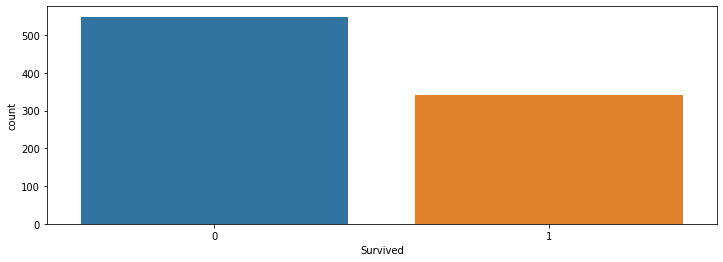

In [77]:
plt.figure(figsize=(12, 4))
sns.countplot(x='Survived', data = train_data)

In [78]:
# precentage of people that survived
train_data['Survived'].sum()/train_data.shape[0]

0.3838383838383838

<AxesSubplot:xlabel='Survived', ylabel='count'>

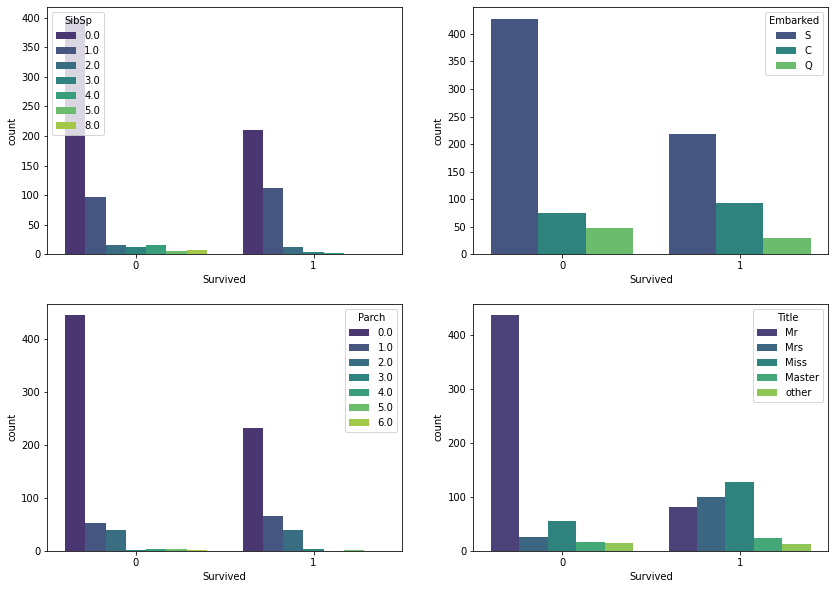

In [79]:
plt.figure(figsize=(14, 10))

plt.subplot(2,2,1)
sns.countplot(x='Survived', hue='SibSp', data = train_data, palette='viridis')

plt.subplot(2,2,2)
sns.countplot(x='Survived', hue='Embarked', data = train_data, palette='viridis')

plt.subplot(2,2,3)
sns.countplot(x='Survived', hue='Parch', data = train_data, palette='viridis')

plt.subplot(2,2,4)
sns.countplot(x='Survived', hue='Title', data = train_data, palette='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

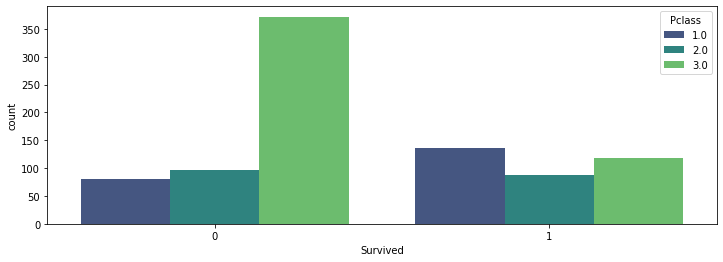

In [80]:
plt.figure(figsize=(12, 4))
sns.countplot(x='Survived', hue='Pclass', data = train_data, palette='viridis')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

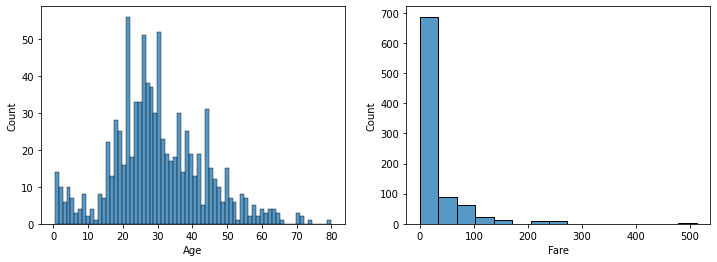

In [81]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
sns.histplot(data=train_data, x="Age", bins=70)
# sns.distplot(train_data['Age'], kde=False, bins=70)

plt.subplot(1,2,2)
sns.histplot(data=train_data, x="Fare", bins=15)
# sns.distplot(train_data['Fare'], kde=False, bins=15)


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:xlabel='Survived'>

<Figure size 1080x720 with 0 Axes>

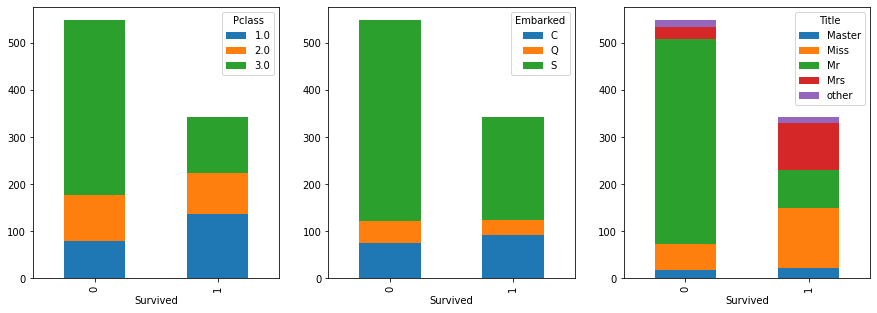

In [82]:
pclass_plot = train_data.groupby(['Pclass', 'Survived']).size().reset_index().pivot(columns='Pclass', index='Survived', values=0)

embarked_plot = train_data.groupby(['Embarked', 'Survived']).size().reset_index().pivot(columns='Embarked', index='Survived', values=0)

title_plot = train_data.groupby(['Title', 'Survived']).size().reset_index().pivot(columns='Title', index='Survived', values=0)


plt.figure(figsize=(15, 10))
figure, axes = plt.subplots(1,3)

pclass_plot.plot.bar(stacked=True, ax = axes[0], figsize=(15,5))

embarked_plot.plot.bar(stacked=True, ax = axes[1], figsize=(15,5))

title_plot.plot.bar(stacked=True, ax = axes[2], figsize=(15,5))

### Encoding Categorical Variables

In [83]:
dummy_df = pd.get_dummies(train_data[['Sex','Embarked','Title']], prefix=['Sex','Embarked','Title'])

In [84]:
dummy_df.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_other
0,0,1,0,0,1,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0
2,1,0,0,0,1,0,1,0,0,0
3,1,0,0,0,1,0,0,0,1,0
4,0,1,0,0,1,0,0,1,0,0


In [85]:
# drop unnecessary columns from dummy_df

dummy_df.drop(['Sex_male', 'Embarked_Q', 'Title_other'], axis=1, inplace=True)

dummy_df.head()

,Sex_female,Embarked_C,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0,0,1,0,0,1,0
1,1,1,0,0,0,0,1
2,1,0,1,0,1,0,0
3,1,0,1,0,0,0,1
4,0,0,1,0,0,1,0


In [86]:
train_data.drop(['Sex', 'Embarked', 'Title'], axis=1, inplace=True)

train_data = pd.concat([train_data, dummy_df], axis=1)

train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,1,0,3.0,22.0,1.0,0.0,7.2500,0,0,1,0,0,1,0
1,2,1,1.0,38.0,1.0,0.0,71.2833,1,1,0,0,0,0,1
2,3,1,3.0,26.0,0.0,0.0,7.9250,1,0,1,0,1,0,0
3,4,1,1.0,35.0,1.0,0.0,53.1000,1,0,1,0,0,0,1
4,5,0,3.0,35.0,0.0,0.0,8.0500,0,0,1,0,0,1,0


In [87]:
# get a list of the columns. Can be used to enforce column ordering.
column_list = list(train_data.columns.values)
print(column_list)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Embarked_C', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs']


Now encode categorical variables for the test_data

In [88]:
test_data.head()

,PassengerId,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare,Title
0,892,male,Q,3.0,34.5,0.0,0.0,7.8292,Mr
1,893,female,S,3.0,47.0,1.0,0.0,7.0000,Mrs
2,894,male,Q,2.0,62.0,0.0,0.0,9.6875,Miss
3,895,male,S,3.0,27.0,0.0,0.0,8.6625,Mrs
4,896,female,S,3.0,22.0,1.0,1.0,12.2875,Mr


In [89]:
test_dummy = pd.get_dummies(test_data[['Sex','Embarked','Title']], prefix=['Sex','Embarked','Title'])

test_dummy.drop(['Sex_male', 'Embarked_Q', 'Title_other'], axis=1, inplace=True)

test_data.drop(['Sex', 'Embarked', 'Title'], axis=1, inplace=True)

test_data = pd.concat([test_data, test_dummy], axis=1)

In [90]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,892,3.0,34.5,0.0,0.0,7.8292,0,0,0,0,0,1,0
1,893,3.0,47.0,1.0,0.0,7.0000,1,0,1,0,0,0,1
2,894,2.0,62.0,0.0,0.0,9.6875,0,0,0,0,1,0,0
3,895,3.0,27.0,0.0,0.0,8.6625,0,0,1,0,0,0,1
4,896,3.0,22.0,1.0,1.0,12.2875,1,0,1,0,0,1,0


In [91]:
test_column_list = list(test_data.columns.values)
print(test_column_list)

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Embarked_C', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs']


### Data now ready for modelling

In [92]:
train_data.to_csv('titanic_train_tranformed.csv', index=False)
test_data.to_csv('titanic_test_transformed.csv', index=False)